# Pymaceuticals Inc.
---

### Analysis

- Based on the boxplot data, Capomulin appears to be the best performing drug in terms of treating tumors. It had the smallest IQR range (7.78) while still having the largest sample of mice tested, demonstrating the most consistent and reliable data with the least varience.
- To visualize mouse tumor size over time when treated with Capomulin, we created a line graph for a specific mouse. For the graph we observed Mouse I509. The line graph showed that the tumor size decreased over time, indicated by a downward slope between days 20 and 35. 
- Other stats to note: The total population of mice tested was split relatively equally between genders (male: 51%, female: 49%). There was also a positive correlation between mouse weight and tumor size, indicated by the correlation coefficient of 0.84. This means that as mouse weight increased, so did tumor size. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID"])
combined_df = combined_df.sort_values(by="Timepoint")
combined_df = combined_df.reset_index(drop=True)
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,s619,Stelasyn,Male,22,30,0,45.0,0
2,a818,Naftisol,Female,12,28,0,45.0,0
3,t198,Propriva,Male,22,26,0,45.0,0
4,a788,Zoniferol,Male,5,30,0,45.0,0


In [2]:
# Checking the number of mice.
combined_df["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_df = combined_df.loc[combined_df["Mouse ID"] == "g989", :]
duplicate_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
189,g989,Propriva,Female,21,26,0,45.000000,0
190,g989,Propriva,Female,21,26,0,45.000000,0
381,g989,Propriva,Female,21,26,5,47.570392,0
382,g989,Propriva,Female,21,26,5,48.786801,0
545,g989,Propriva,Female,21,26,10,51.745156,0
572,g989,Propriva,Female,21,26,10,49.880528,0
747,g989,Propriva,Female,21,26,15,51.325852,1
760,g989,Propriva,Female,21,26,15,53.442020,0
1068,g989,Propriva,Female,21,26,20,55.326122,1
1069,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[~combined_df["Mouse ID"].isin(duplicate_mice)]
clean_df.head() 

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
1,s619,Stelasyn,Male,22,30,0,45.0,0
2,a818,Naftisol,Female,12,28,0,45.0,0
3,t198,Propriva,Male,22,26,0,45.0,0
4,a788,Zoniferol,Male,5,30,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
column_names_mapping = {
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Varience',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume Std. Error'}

summary_stats = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
summary_stats = summary_stats.rename(columns=column_names_mapping)

summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Varience,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

In [9]:
# count number of rows (Mouse ID/Timepoints) for each drug regimen 
timepoints_count = clean_df["Drug Regimen"].value_counts()
timepoints_df = timepoints_count.to_frame().rename(columns={"Drug Regimen": "count"})
timepoints_df.index.name = 'Drug Regimen'
timepoints_df

,count
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178


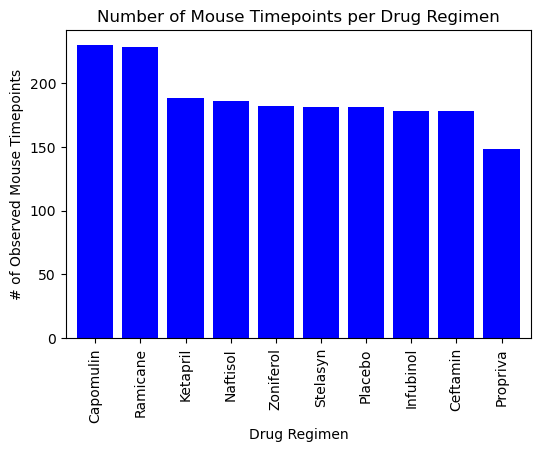

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_df.plot(kind='bar', figsize=(6,4), color='blue', width=0.8, legend=False)
plt.title("Number of Mouse Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

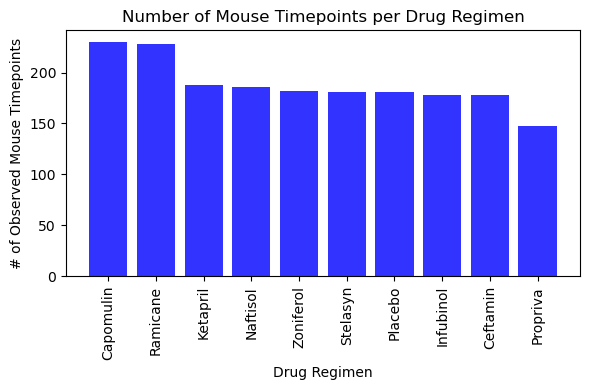

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = pd.Series({'Capomulin': 230,'Ramicane': 228,'Ketapril': 188,
                         'Naftisol': 186,'Zoniferol': 182,'Stelasyn': 181,
                         'Placebo': 181,'Infubinol': 178,'Ceftamin': 178,
                         'Propriva': 148})

x_axis = drug_counts.index.values
y_axis = drug_counts.values

plt.figure(figsize=(6,4))
plt.bar(x_axis, y_axis, color='blue', alpha=0.8, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.title("Number of Mouse Timepoints per Drug Regimen")

plt.tight_layout()
plt.show()


In [12]:
# create a data table for mouse gender data to use for plotting with Pandas
gender_data = clean_df["Sex"].value_counts()
gender_data_df = gender_data.to_frame().rename(columns={"Sex": "Count"})
gender_data_df.index.name = 'Sex'
gender_data_df

,count
Sex,
Male,958
Female,922


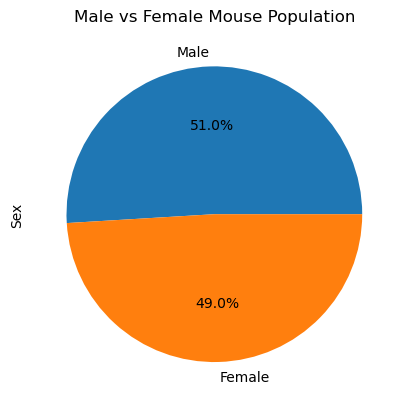

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_data_df.plot.pie(autopct= "%1.1f%%", y='count', ylabel="Sex", legend=False)
plt.title("Male vs Female Mouse Population")
plt.show()

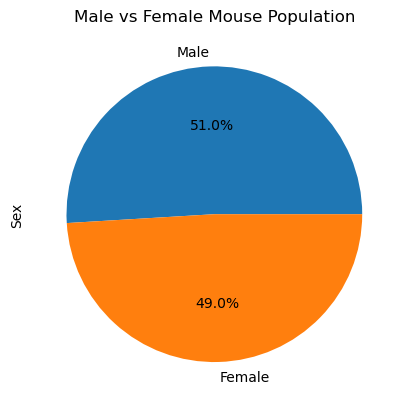

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [958, 922]
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.title("Male vs Female Mouse Population")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

drugs = combined_df[combined_df["Drug Regimen"].isin(drug_list)]
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

for drug in drug_list:
    tumor_volume = last_timepoint.loc[drug, 'tumor_size']
    quartiles = tumor_volume.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq - lowerq, 2)
    lower_bound = round(lowerq - (1.5 * iqr), 2)
    upper_bound = round(upperq + (1.5 * iqr), 2)
    
    
    print(f"------------------------------------------------------------")
    print(f"{drug} lower quartile: {lowerq}, upper quartile is: {upperq}")
    print(f"{drug} IQR is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")


------------------------------------------------------------
Capomulin lower quartile: 32.37735684, upper quartile is: 40.1592203
Capomulin IQR is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
------------------------------------------------------------
Ramicane lower quartile: 31.56046955, upper quartile is: 40.65900627
Ramicane IQR is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
------------------------------------------------------------
Infubinol lower quartile: 54.04860769, upper quartile is: 65.52574285
Infubinol IQR is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
------------------------------------------------------------
------------------------------------------------------------
Ceftamin lo

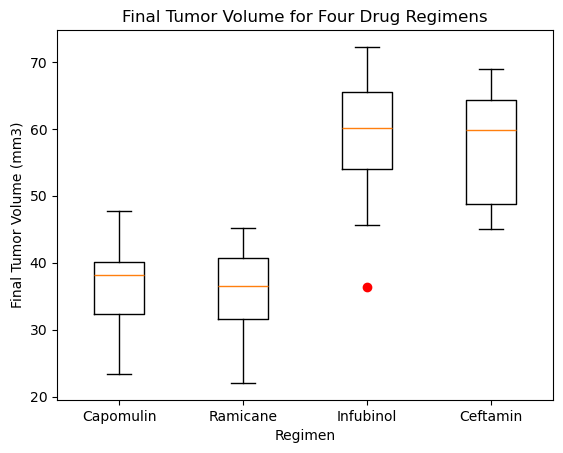

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create empty list to fill with tumor vol data (for plotting)
boxplot_list = []
for drug in drug_list:
    tumor_volume = last_timepoint.loc[drug, 'tumor_size']
    tumor_volume_list = list(tumor_volume.dropna())
    boxplot_list.append(tumor_volume_list)
    
fig = plt.figure()
plt.xlabel("Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Final Tumor Volume for Four Drug Regimens")
plt.boxplot(boxplot_list, labels=drug_list, widths=0.4, sym="red")
plt.show()

## Line and Scatter Plots

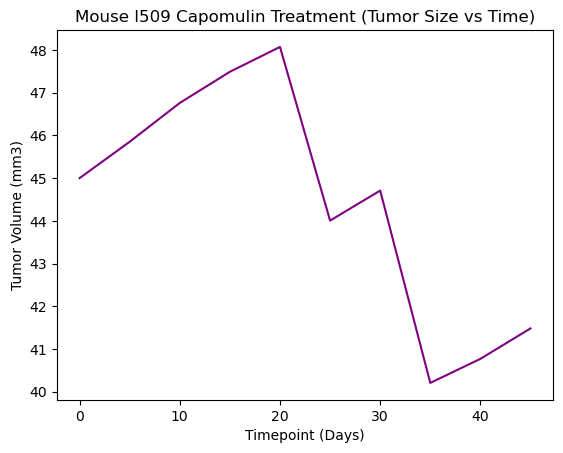

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
line_data_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
x_axis = line_data_df["Timepoint"]
tumor_size = line_data_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title("Mouse l509 Capomulin Treatment (Tumor Size vs Time)")
plt.plot(x_axis, tumor_size, color="purple")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

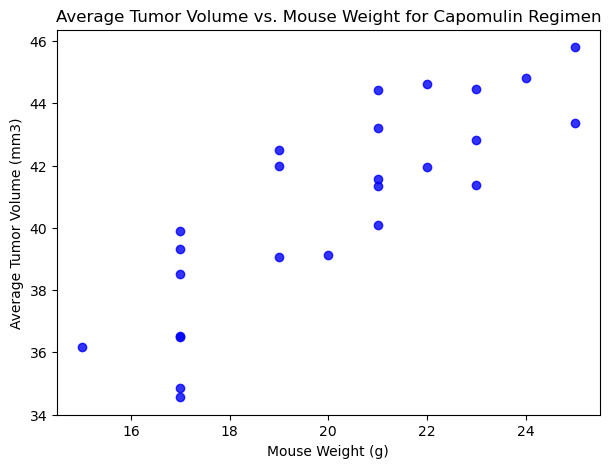

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

average_data = Capomulin_df.groupby('Mouse ID').agg({'Tumor Volume (mm3)': 'mean', 'Weight (g)': 'mean'})

plt.figure(figsize=(7, 5))
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], color='blue', alpha=0.8)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume vs. Mouse Weight for Capomulin Regimen')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


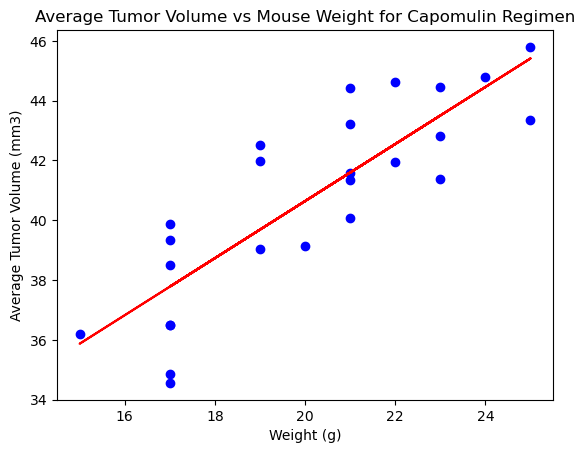

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(average_data["Weight (g)"],average_data["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

(slope, intercept, rvalue, pvalue, stderr) = linregress(average_data["Weight (g)"],average_data["Tumor Volume (mm3)"])
regress_values = average_data["Weight (g)"]* slope + intercept
line_equation= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.scatter(average_data["Weight (g)"],average_data["Tumor Volume (mm3)"],color="blue")
plt.plot(average_data["Weight (g)"], regress_values, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin Regimen")
plt.show()
